In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\CNP\CNP_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2
0,-0.45866,-1.235200
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,0.89265,0.278030
3996,0.74741,0.428530
3997,1.07660,0.085708
3998,0.70388,0.351420


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	80


In [4]:
df.describe()

,column 1,column 2
count,4000.000000,3920.000000
mean,0.006711,0.003085
std,0.726242,0.721533
min,-1.714600,-1.376500
25%,-0.500103,-0.516975
50%,0.013352,0.004026
75%,0.553305,0.520205
max,1.363900,1.344400


<AxesSubplot:>

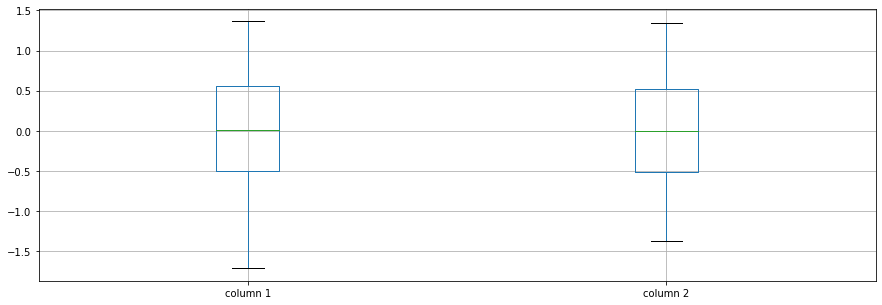

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.006711
column 2    0.003085
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2
column 1,1.000000,0.006305
column 2,0.006305,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [11]:
imputer = md.Midas(layer_structure = [2,2+100,2+100+100,2+100+100+100,2+100+100+100+100,2+100+100+100+100+100,2+100+100+100+100,2+100+100+100,2+100+100,2+100,2], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=300)


Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.4217069096565247
Epoch: 1 , loss: 1.4218551292419435
Epoch: 2 , loss: 1.4038243680000304
Epoch: 3 , loss: 1.3746226582527161
Epoch: 4 , loss: 1.352316442012787
Epoch: 5 , loss: 1.3511238827705383
Epoch: 6 , loss: 1.3360105900764465
Epoch: 7 , loss: 1.3417283492088319
Epoch: 8 , loss: 1.340574197769165
Epoch: 9 , loss: 1.3389917211532594
Epoch: 10 , loss: 1.337153847694397
Epoch: 11 , loss: 1.332426426410675
Epoch: 12 , loss: 1.3336551451683045
Epoch: 13 , loss: 1.3275335454940795
Epoch: 14 , loss: 1.3304984941482545
Epoch: 15 , loss: 1.3318544096946716
Epoch: 16 , loss: 1.3320349364280701
Epoch: 17 , loss: 1.3350982661247253
Epoch: 18 , loss: 1.3319101133346558
Epoch: 19 , loss: 1.3263442344665528
Epoch: 20 , loss: 1.3265855102539061
Epoch: 21 , loss: 1.3309996161460877
Epoch: 22 , loss: 1.3322919793128967
Epoch: 23 , loss: 1.327385461807251
Epoch: 24 , loss: 1.3331302814483643
Epoch: 25 , loss: 1.328

Epoch: 218 , loss: 1.3381129932403564
Epoch: 219 , loss: 1.3410554242134094
Epoch: 220 , loss: 1.3425504546165465
Epoch: 221 , loss: 1.3427427802085876
Epoch: 222 , loss: 1.3371988067626952
Epoch: 223 , loss: 1.34491441655159
Epoch: 224 , loss: 1.3408555231094361
Epoch: 225 , loss: 1.3417352166175842
Epoch: 226 , loss: 1.33967089176178
Epoch: 227 , loss: 1.3400369710922242
Epoch: 228 , loss: 1.3421110010147095
Epoch: 229 , loss: 1.3387300267219544
Epoch: 230 , loss: 1.3399327759742736
Epoch: 231 , loss: 1.3380577731132508
Epoch: 232 , loss: 1.344125235080719
Epoch: 233 , loss: 1.3410243802070618
Epoch: 234 , loss: 1.3419226508140565
Epoch: 235 , loss: 1.3348899269104004
Epoch: 236 , loss: 1.3389256134033203
Epoch: 237 , loss: 1.3416465754508973
Epoch: 238 , loss: 1.3389242849349976
Epoch: 239 , loss: 1.346323356628418
Epoch: 240 , loss: 1.338273895740509
Epoch: 241 , loss: 1.3444574480056763
Epoch: 242 , loss: 1.3457281908988952
Epoch: 243 , loss: 1.3404052901268004
Epoch: 244 , loss: 

In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4000, 2)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.025127
column 2   -1.258200
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\CNP.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3995,0.0,0.0
3996,0.0,0.0
3997,0.0,0.0
3998,0.0,0.0


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(8.071030376419628, 64.9340549279942)

In [19]:
NRMS=numerator/denominator
NRMS


0.12429580110728719

In [20]:
new_df.iloc[66,:]

column 1    0.12305
column 2   -1.03610
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2
0,-0.45866,-1.235200
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,0.89265,0.278030
3996,0.74741,0.428530
3997,1.07660,0.085708
3998,0.70388,0.351420


In [22]:
imputations[-1].to_excel("CNP_NL_1(imp).xlsx", index=False, header=False)